In [50]:
import keras
import tensorflow
import matplotlib.pyplot as plt
from tensorflow.keras import backend as K
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, Flatten, MaxPool2D, MaxPooling2D,Dropout
from tensorflow.keras.optimizers import Adam,SGD,Adagrad,Adadelta,RMSprop
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.applications.imagenet_utils import preprocess_input, decode_predictions
from tensorflow.keras import layers
import numpy as np
from PIL import Image

In [2]:
from tensorflow.keras.applications.inception_v3 import InceptionV3


In [3]:
from tensorflow.keras.models import load_model
pre_trained_model = InceptionV3(input_shape = (150, 150, 3), 
                                include_top = False, 
                                weights = None)

In [4]:
pre_trained_model.load_weights('inception_v3_weights_tf_dim_ordering_tf_kernels_notop.h5')

In [5]:
pre_trained_model.trainalble = False

In [6]:
pre_trained_model.summary()

Model: "inception_v3"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 150, 150, 3) 0                                            
__________________________________________________________________________________________________
conv2d (Conv2D)                 (None, 74, 74, 32)   864         input_1[0][0]                    
__________________________________________________________________________________________________
batch_normalization (BatchNorma (None, 74, 74, 32)   96          conv2d[0][0]                     
__________________________________________________________________________________________________
activation (Activation)         (None, 74, 74, 32)   0           batch_normalization[0][0]        
_______________________________________________________________________________________

In [7]:
last_layer = pre_trained_model.get_layer('mixed7')
print('last layer output shape: ', last_layer.output_shape)
last_output = last_layer.output

last layer output shape:  (None, 7, 7, 768)


In [8]:
from tensorflow.keras.optimizers import RMSprop
from tensorflow.keras import Model


# Flatten the output layer to 1 dimension
x = layers.Flatten()(last_output)
# Add a fully connected layer with 1,024 hidden units and ReLU activation
x = layers.Dense(1024, activation='relu')(x)
# Add a dropout rate of 0.2
x = layers.Dropout(0.2)(x)                  
# Add a final sigmoid layer for classification
x = layers.Dense  (1, activation='sigmoid')(x)           

model = Model( pre_trained_model.input, x) 

model.compile(optimizer = RMSprop(lr=0.0001), 
              loss = 'binary_crossentropy', 
              metrics = ['acc'])


In [12]:
import os

# Define our example directories and files
base_dir = 'C:\\Users\\surbh\\Desktop\\cats_and_dogs_filtered\\'

train_dir = os.path.join( base_dir, 'train')
validation_dir = os.path.join( base_dir, 'validation')


train_cats_dir = os.path.join(train_dir, 'cats') # Directory with our training cat pictures
train_dogs_dir = os.path.join(train_dir, 'dogs') # Directory with our training dog pictures

validation_cats_dir = os.path.join(validation_dir, 'cats') # Directory with our validation cat pictures
validation_dogs_dir = os.path.join(validation_dir, 'dogs')# Directory with our validation dog pictures

train_cat_fnames = os.listdir(train_cats_dir)
train_dog_fnames = os.listdir(train_dogs_dir)


In [14]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Add our data-augmentation parameters to ImageDataGenerator
train_datagen = ImageDataGenerator(rescale = 1./255.,
                                   rotation_range = 40,
                                   width_shift_range = 0.2,
                                   height_shift_range = 0.2,
                                   shear_range = 0.2,
                                   zoom_range = 0.2,
                                   horizontal_flip = True)

# Note that the validation data should not be augmented!
test_datagen = ImageDataGenerator( rescale = 1.0/255. )

# Flow training images in batches of 20 using train_datagen generator
train_generator = train_datagen.flow_from_directory(train_dir,
                                                    batch_size = 20,
                                                    class_mode = 'binary', 
                                                    target_size = (150, 150))     

# Flow validation images in batches of 20 using test_datagen generator
validation_generator =  test_datagen.flow_from_directory( validation_dir,
                                                          batch_size  = 20,
                                                          class_mode  = 'binary', 
                                                          target_size = (150, 150))

Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.


In [16]:
import os
# Directory where the checkpoints will be saved
checkpoint_dir = 'C:\\Users\\surbh\\Desktop\\cats_and_dogs_filtered\\checkpoints\\'
# Name of the checkpoint files
checkpoint_prefix = os.path.join(checkpoint_dir, "ckpt1_{epoch}")

checkpoint_callback=keras.callbacks.ModelCheckpoint(
    filepath=checkpoint_prefix,
    save_weights_only=True)

In [17]:
history = model.fit_generator(
            train_generator,
            validation_data = validation_generator,
            steps_per_epoch = 100,
            epochs = 20,
            validation_steps = 50,
            verbose = 1)

  ...
    to  
  ['...']
  ...
    to  
  ['...']
Train for 100 steps, validate for 50 steps
Epoch 1/20
100/100 [==============================] - 223s 2s/step - loss: 0.2270 - acc: 0.9005 - val_loss: 0.2023 - val_acc: 0.9540
Epoch 2/20
100/100 [==============================] - 228s 2s/step - loss: 0.1778 - acc: 0.9420 - val_loss: 0.2767 - val_acc: 0.9600
Epoch 3/20
100/100 [==============================] - 225s 2s/step - loss: 0.1456 - acc: 0.9480 - val_loss: 0.5073 - val_acc: 0.9350
Epoch 4/20
100/100 [==============================] - 227s 2s/step - loss: 0.1340 - acc: 0.9520 - val_loss: 1.1323 - val_acc: 0.9150
Epoch 5/20
100/100 [==============================] - 237s 2s/step - loss: 0.0988 - acc: 0.9670 - val_loss: 0.4366 - val_acc: 0.9500
Epoch 6/20
100/100 [==============================] - 241s 2s/step - loss: 0.0869 - acc: 0.9770 - val_loss: 0.2970 - val_acc: 0.9600
Epoch 7/20
100/100 [==============================] - 241s 2s/step - loss: 0.0802 - acc: 0.9745 - val_loss: 1

In [18]:
model.save("Transferlearning.h5")

[[1]]
dog


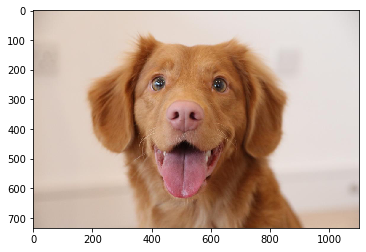

In [65]:
# make a prediction for a new image.
from tensorflow.keras.preprocessing.image import load_img
from tensorflow.keras.preprocessing.image import img_to_array
from tensorflow.keras.models import load_model
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

# load and prepare the image
def load_image(filename):
    # load the image
    img = load_img(filename, grayscale=False, target_size=(150, 150))
    #image = Image.open('dog2.jpg')
    # convert to array
    img = img_to_array(img)
    # reshape into a single sample with 1 channel
    img = img.reshape(1, 150, 150, 3)
    # prepare pixel data
    img = img.astype('float32')
    img = img / 255.0
    return img

# load an image and predict the class
def run_example():
    # load the image
    img = load_image('dog2.jpg')

    # load model
    model = load_model('Transferlearning.h5')
    # predict the class
    result = model.predict(img)
    plt.show()
    
    output=result.astype(int)
    print(output)
    if output==0:
        print("cat")
    else:
        print('dog')
    #print('Predicted:', decode_predictions(result))
    img1=mpimg.imread('dog2.jpg')
    imgplot = plt.imshow(img1)
# entry point, run the example
run_example()